In [149]:
import tensorflow as tf

In [150]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [151]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [152]:
features = extract_features('data/Want to find/Images/ArrestPerson_images/realigned/0.png', model)
print(len(features))

100352


In [178]:
filenames = []

In [154]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [161]:
!pwd

/Users/shivamralli/Desktop/Competitions/KCP


In [179]:
root_dir = 'woman/'
fnames = sorted(get_file_list(root_dir))

In [180]:
for i in fnames:
    filenames.append(i)

In [181]:
filenames

['woman/ArrestPerson1017.png',
 'woman/ArrestPerson102.png',
 'woman/ArrestPerson1150.png',
 'woman/ArrestPerson1193.png',
 'woman/ArrestPerson1222.png',
 'woman/ArrestPerson1264.png',
 'woman/ArrestPerson1282.png',
 'woman/ArrestPerson135.png',
 'woman/ArrestPerson1357.png',
 'woman/ArrestPerson1359.png',
 'woman/ArrestPerson1387.png',
 'woman/ArrestPerson144.png',
 'woman/ArrestPerson1450.png',
 'woman/ArrestPerson1511.png',
 'woman/ArrestPerson1515.png',
 'woman/ArrestPerson1641.png',
 'woman/ArrestPerson1656.png',
 'woman/ArrestPerson1682.png',
 'woman/ArrestPerson1727.png',
 'woman/ArrestPerson1742.png',
 'woman/ArrestPerson1770.png',
 'woman/ArrestPerson1816.png',
 'woman/ArrestPerson1827.png',
 'woman/ArrestPerson1841.png',
 'woman/ArrestPerson1844.png',
 'woman/ArrestPerson1846.png',
 'woman/ArrestPerson1851.png',
 'woman/ArrestPerson1858.png',
 'woman/ArrestPerson1861.png',
 'woman/ArrestPerson1863.png',
 'woman/ArrestPerson1869.png',
 'woman/ArrestPerson1870.png',
 'woman/Arr

In [182]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

In [183]:
pickle.dump(feature_list, open('resnet_features_woman.pickle', 'wb'))
pickle.dump(filenames, open('resnet_filenames_woman.pickle','wb'))

## Checking

In [114]:
filenames = pickle.load(open('resnet_filenames_all.pickle', 'rb'))
feature_list = pickle.load(open('resnet_features_all.pickle', 'rb'))

In [136]:
feature = extract_features('data/missing_images/realigned/2.png', model)

In [137]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature])

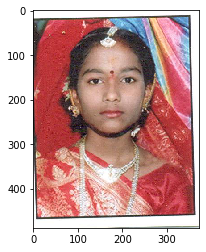

In [138]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline       
plt.imshow(mpimg.imread(filenames[0]))

In [139]:
for i in range(5):
    print(distances[0][i])

0.9376875
0.9466938
0.97606266
0.9803045
0.98243225


In [140]:
indices

array([[226, 130, 399,  35, 109]])

In [141]:
indices[0][0]

226

In [184]:
filenames[indices[0][1]]

'woman/ArrestPerson2199.png'

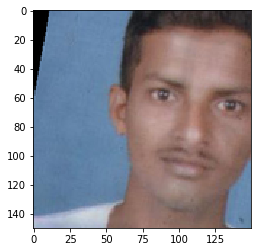

In [142]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]))

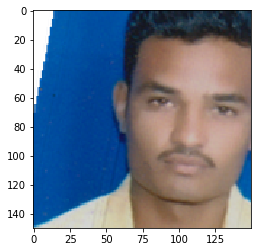

In [143]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]))

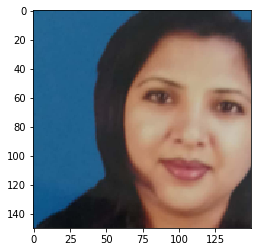

In [144]:
plt.imshow(mpimg.imread(filenames[indices[0][2]]))

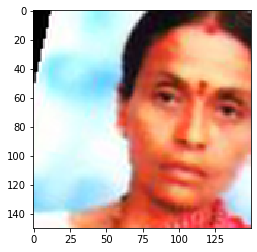

In [145]:
plt.imshow(mpimg.imread(filenames[indices[0][3]]))

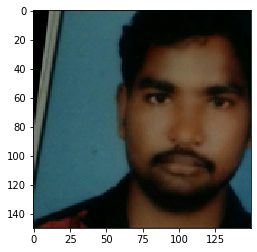

In [146]:
plt.imshow(mpimg.imread(filenames[indices[0][4]]))